In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install -q keras

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
test_path ='/content/drive/MyDrive/Colab_Notebooks/ml_project/test'
train_path = '/content/drive/MyDrive/Colab_Notebooks/ml_project/train'
valid_path = '/content/drive/MyDrive/Colab_Notebooks/ml_project/valid'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['dr', 'nodr'], batch_size=10)
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['dr', 'nodr'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['dr', 'nodr'], batch_size=10)


Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0] is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
imgs , labels = next(train_batches)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


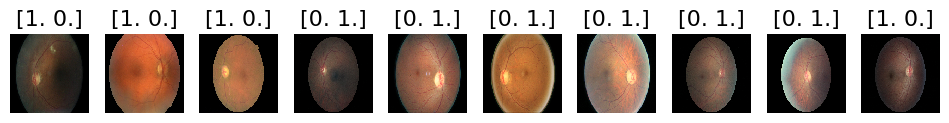

In [ ]:
plots(imgs, titles=labels)

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16

# Create a VGG16 model
vgg16_model = VGG16()

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

keras.src.engine.functional.Functional

In [ ]:
from tensorflow.keras.models import Sequential  # Import the Sequential class

model = Sequential()  # Create a Sequential model

for layer in vgg16_model.layers[:-1]:
    model.add(layer)  # Add layers to the model


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
from keras.layers import Dense  # Import the Dense layer

model.add(Dense(2, activation='softmax'))  # Add a Dense layer to the model


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer

model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
4/4 - 66s - loss: 1.1687 - accuracy: 0.4250 - val_loss: 1.1059 - val_accuracy: 0.4500 - 66s/epoch - 16s/step
Epoch 2/5
4/4 - 69s - loss: 0.8261 - accuracy: 0.4250 - val_loss: 1.0469 - val_accuracy: 0.4000 - 69s/epoch - 17s/step
Epoch 3/5
4/4 - 53s - loss: 0.8354 - accuracy: 0.5250 - val_loss: 1.1053 - val_accuracy: 0.4750 - 53s/epoch - 13s/step
Epoch 4/5
4/4 - 71s - loss: 0.8242 - accuracy: 0.5750 - val_loss: 1.0657 - val_accuracy: 0.4500 - 71s/epoch - 18s/step
Epoch 5/5
4/4 - 70s - loss: 0.7332 - accuracy: 0.6250 - val_loss: 1.0201 - val_accuracy: 0.4500 - 70s/epoch - 18s/step


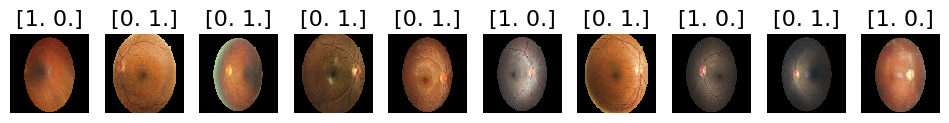

In [ ]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [ ]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 0., 1., 0., 1., 0., 1.], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [ ]:
predictions = model.predict(test_batches, steps=1, verbose=0)

In [ ]:
from sklearn.metrics import confusion_matrix  # Import the confusion_matrix function

cm = confusion_matrix(test_labels, np.round(predictions[:, 0]))


Confusion matrix, without normalization
[[3 3]
 [0 4]]


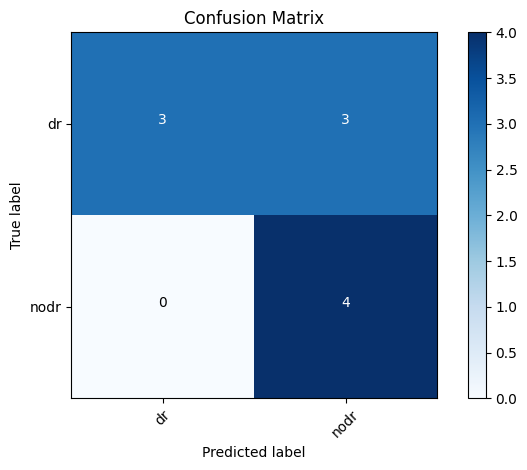

In [ ]:
import itertools  # Import the itertools module


cm_plot_labels = ['dr', 'nodr']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')


In [ ]:
model.save('diabetic_retinopathy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install keras

In [ ]:
!pip install keras --upgrade

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.15.0 which is incompatible.


In [ ]:
!pip install --upgrade keras tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [ ]:
import base64
import numpy as np
import io
from PIL import Image
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array

import json
import h5py
import tensorflow as ttf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import socket

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
ttf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
def fix_layer0(filename, batch_input_shape, dtype):
    with h5py.File(filename, 'r+') as f:
        model_config = json.loads(f.attrs['model_config'])
        layer0 = model_config['config']['layers'][0]['config']
        layer0['batch_input_shape'] = batch_input_shape
        layer0['dtype'] = dtype
        f.attrs['model_config'] = json.dumps(model_config).encode('utf-8')

def get_model():
    global model,graph
    model = tf.keras.models.load_model('diabetic_retinopathy.h5', compile=False)
    print(" * Model Loaded!!")
    graph = tf.get_default_graph()

def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    return image

print(" * Loading keras model.....")
fix_layer0('diabetic_retinopathy.h5', [None, 224, 224,3], 'float32')
get_model()

 * Loading keras model.....
 * Model Loaded!!


In [ ]:
import tensorflow as tf

# assuming `prediction` is a symbolic tensor
image = Image.open('/content/drive/MyDrive/Colab_Notebooks/ml_project/test/dr/54_right.jpeg')
image.show()
processed_image = preprocess_image(image, target_size=(224, 224))
prediction = model.predict_on_batch(processed_image)
prediction_shape = tf.shape(prediction)
num_samples = prediction_shape[0]

def condition(tempDr, tempndr):
    return tempDr > tempndr

def true_fn(tempDr, tempndr):
    return 1;

def false_fn(tempDr, tempndr):
    return 0;

with tf.compat.v1.Session() as sess:
    for i in range(sess.run(num_samples)):
        tempDr = prediction[i][0]
        tempndr = prediction[i][1]
        result = true_fn(tempDr, tempndr)
        output = tf.cond(condition(tempDr, tempndr), lambda: true_fn(tempDr, tempndr), lambda: false_fn(tempDr, tempndr))
        if result==1:
          print('Diabetic Retinopathy')
        else:
          print('No Diabetic Retinopathy')


image.show()

Diabetic Retinopathy


In [ ]:
import tensorflow as tf

# assuming `prediction` is a symbolic tensor
image = Image.open('/content/drive/MyDrive/Colab_Notebooks/ml_project/test/nodr/46_right.jpeg')
image.show()
processed_image = preprocess_image(image, target_size=(224, 224))
prediction = model.predict_on_batch(processed_image)
prediction_shape = tf.shape(prediction)
num_samples = prediction_shape[0]

def condition(tempDr, tempndr):
    return tempDr > tempndr

def true_fn(tempDr, tempndr):
    return 1;

def false_fn(tempDr, tempndr):
    return 0;

with tf.compat.v1.Session() as sess:
    for i in range(sess.run(num_samples)):
        tempDr = prediction[i][0]
        tempndr = prediction[i][1]
        result = false_fn(tempDr, tempndr)
        output = tf.cond(condition(tempDr, tempndr), lambda: true_fn(tempDr, tempndr), lambda: false_fn(tempDr, tempndr))
        if result==1:
          print('Diabetic Retinopathy')
        else:
          print('No Diabetic Retinopathy')



No Diabetic Retinopathy
